In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
file_to_read = 'summary_democrats_republicans.csv'

df = pd.read_csv(file_to_read, usecols=[1, 2, 3, 4])

In [8]:
def side_by_side(*objs, **kwds):
    ''' Une fonction print objects side by side '''
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print(adjoin(space, *reprs))

# df = df.dropna()
a = .5
df['c_adj'] = df['controversy'] / df['controversy'].max()
df['js_adj'] = df['tfidf'] / df['tfidf'].max()
df['ms_adj'] = df['logodds'] / df['logodds'].max()

# controversy times joint significance (tfidf)
df['c x js'] = (df['controversy'] ** a) * (df['js_adj'] ** a)
# controversy times marginal significance (logodds)
df['c x ms'] = (df['controversy'] ** a) * (df['ms_adj'] ** a)

df = df.round(2)

print(len(df))

pd.options.display.max_rows = 100

dfa = df.sort_values(by='controversy', ascending=False)
dfb = df.sort_values(by='js_adj', ascending=False)
dfc = df.sort_values(by='ms_adj', ascending=False)
side_by_side(dfa[['term', 'controversy']].head(100),
             dfb[['term', 'js_adj']].head(100), 
             dfc[['term', 'ms_adj']].head(100))


df1 = df.sort_values(by='c x js', ascending=False)
df2 = df.sort_values(by='c x ms', ascending=False)
side_by_side(dfa[['term', 'controversy']].head(100), df1[['term', 'c x js']].head(100),df2[['term', 'c x ms']].head(100))


46461
                                                    term  controversy                               term  js_adj                                term  ms_adj
10582                                       honor_legacy         0.64    10269                   covid19     1.0    11071                   arkansas    1.00
36736  near_fundingprogramsloanspaycheckprotectionpro...         0.64    0                     touchdown     0.0    27967                  socialist    0.91
17784                                          file_make         0.63    30977             alloftheabove     0.0    34388  paycheckprotectionprogram    0.87
7716                                  interest_penalties         0.63    30969              nameandshame     0.0    41311             climate_change    0.87
31090                                   payments_without         0.63    30970                   ksworks     0.0    30650             speaker_pelosi    0.83
3034                                taxpayers_busine

Text(0.5, 0, 'Controversy')

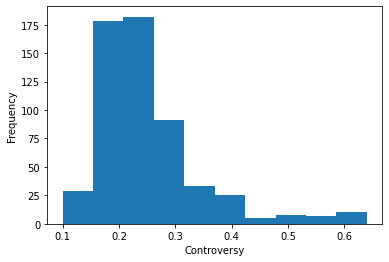

In [3]:
df['controversy'].plot(x='controversy', kind='hist')
plt.xlabel('Controversy')

Text(0.5, 0, 'Normalized joint significance')

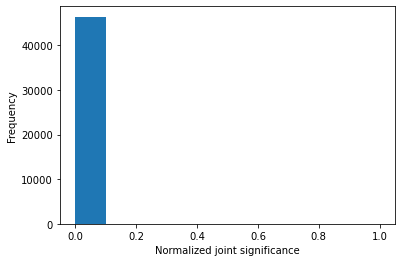

In [4]:
df['js_adj'].plot(x='js_adj', kind='hist')
plt.xlabel('Normalized joint significance')

Text(0.5, 0, 'Normalized marginal significance')

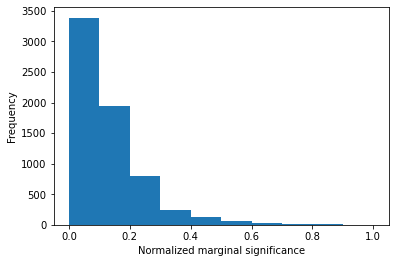

In [5]:
df['ms_adj'].plot(x='ms_adj', kind='hist')
plt.xlabel('Normalized marginal significance')

Text(0, 0.5, 'Normalized joint significance')

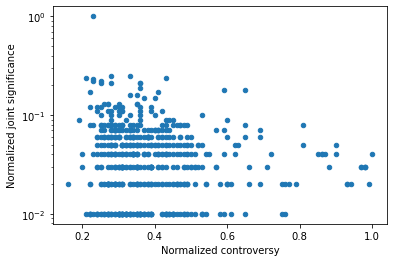

In [6]:
# df['controversy_adj'] = np.log(df['controversy_adj'])
df.plot(x='c_adj', y='js_adj', logy=True, kind='scatter')
plt.xlabel('Normalized controversy')
plt.ylabel('Normalized joint significance')

Text(0, 0.5, 'Normalized marginal significance')

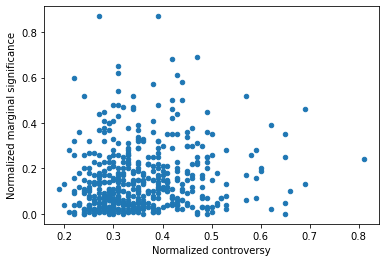

In [7]:
# df['controversy_adj'] = np.log(df['controversy_adj'])
df.plot(x='c_adj', y='ms_adj', kind='scatter')
plt.xlabel('Normalized controversy')
plt.ylabel('Normalized marginal significance')